In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.dates as mdates
import data
plt.style.use('seaborn-poster')

In [2]:
file = "/Users/ketch/Research/Projects/covid-data-sources/MOMO_spain/data.csv"
df = pd.read_csv(file)

In [3]:
df.head()

,ambito,cod_ambito,cod_ine_ambito,nombre_ambito,cod_sexo,nombre_sexo,cod_gedad,nombre_gedad,fecha_defuncion,defunciones_observadas,defunciones_observadas_lim_inf,defunciones_observadas_lim_sup,defunciones_esperadas,defunciones_esperadas_q01,defunciones_esperadas_q99
0,nacional,NaN,NaN,NaN,all,todos,all,todos,2018-09-27,994,994.0,994.0,1012.75,915.3,1124.05
1,nacional,NaN,NaN,NaN,all,todos,all,todos,2018-09-28,1014,1014.0,1014.0,1013.25,915.3,1124.05
2,nacional,NaN,NaN,NaN,all,todos,all,todos,2018-09-29,997,997.0,997.0,1013.25,929.2,1124.05
3,nacional,NaN,NaN,NaN,all,todos,all,todos,2018-09-30,935,935.0,935.0,1015.50,929.2,1126.80
4,nacional,NaN,NaN,NaN,all,todos,all,todos,2018-10-01,968,968.0,968.0,1021.25,929.2,1126.80


In [4]:
df['fecha_defuncion'] = pd.to_datetime(df['fecha_defuncion'])  

In [5]:
data_dates, cum_cases, cum_deaths = data.load_time_series('Spain',smooth=False)
conf_deaths = np.insert(np.diff(cum_deaths),0,cum_deaths[0])

43332.75
1.4238609888687548


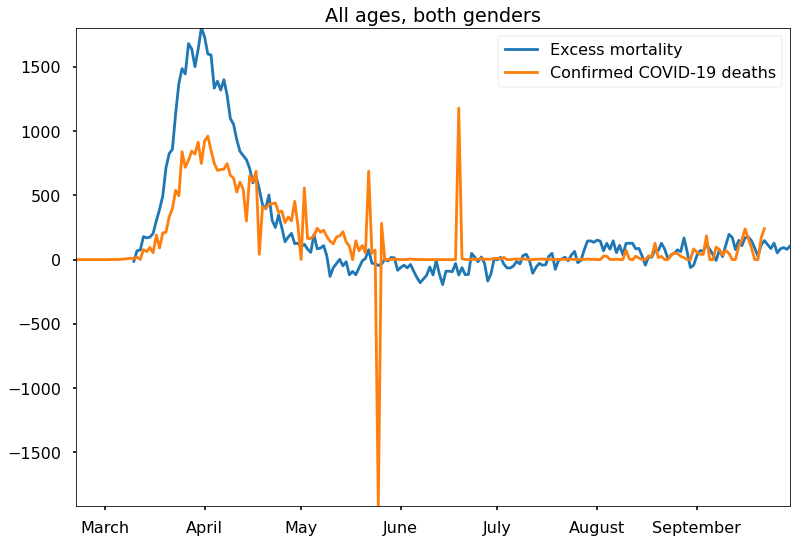

In [6]:
rows = df.loc[(df['ambito'] == 'nacional') & (df['nombre_sexo']=='todos') & (df['nombre_gedad']=='todos')
              & (df['fecha_defuncion']>'2020-03-09')]

expected = np.array(rows.defunciones_esperadas)
observed = np.array(rows.defunciones_observadas)
dates = np.array(rows.fecha_defuncion)

trunc=14
plt.plot_date(dates[:-trunc],observed[:-trunc]-expected[:-trunc],'-',label='Excess mortality');
plt.plot_date(data_dates[30:-trunc],conf_deaths[30:-trunc],'-',label='Confirmed COVID-19 deaths')
print(sum(observed-expected))
print(sum(observed[:-trunc]-expected[:-trunc])/sum(conf_deaths[:-trunc]))
plt.legend()
ax = plt.gca()
ax.autoscale(enable=True, axis='both', tight=True)
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%B'))
plt.title('All ages, both genders');

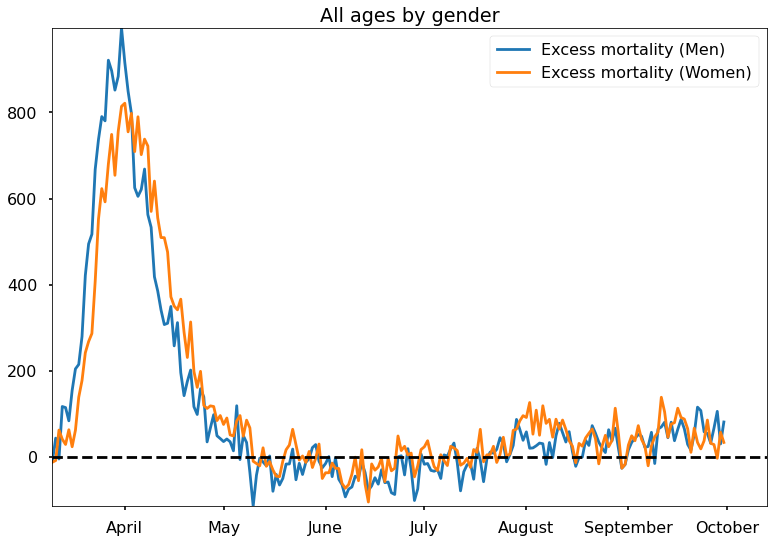

In [18]:
m_rows = df.loc[(df['ambito'] == 'nacional') & (df['nombre_sexo']=='hombres') & (df['nombre_gedad']=='todos')
              & (df['fecha_defuncion']>'2020-03-09')]
f_rows = df.loc[(df['ambito'] == 'nacional') & (df['nombre_sexo']=='mujeres') & (df['nombre_gedad']=='todos')
              & (df['fecha_defuncion']>'2020-03-09')]

m_excess = np.array(m_rows.defunciones_observadas) - np.array(m_rows.defunciones_esperadas)
f_excess = np.array(f_rows.defunciones_observadas) - np.array(f_rows.defunciones_esperadas)
dates = np.array(rows.fecha_defuncion)

plt.plot_date(dates[:-trunc],m_excess[:-trunc],'-',label='Excess mortality (Men)');
plt.plot_date(dates[:-trunc],f_excess[:-trunc],'-',label='Excess mortality (Women)');
#plt.plot_date(data_dates[30:],conf_deaths[30:],'-',label='Confirmed COVID-19 deaths')
plt.legend()
ax = plt.gca()
ax.autoscale(enable=True, axis='both', tight=True)
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%B'))
plt.title('All ages by gender');
plt.plot(xlim,[0,0],'--k')

In [8]:
print(np.sum(m_excess[:-trunc]*np.arange(len(m_excess[:-trunc])))/np.sum(m_excess[:-trunc]))
print(np.sum(f_excess[:-trunc]*np.arange(len(f_excess[:-trunc])))/np.sum(f_excess[:-trunc]))

35.30417740739433
46.15768129003187


In [9]:
df.nombre_gedad.unique()

array(['todos', 'edad < 65', 'edad 65-74', 'edad > 75'], dtype=object)

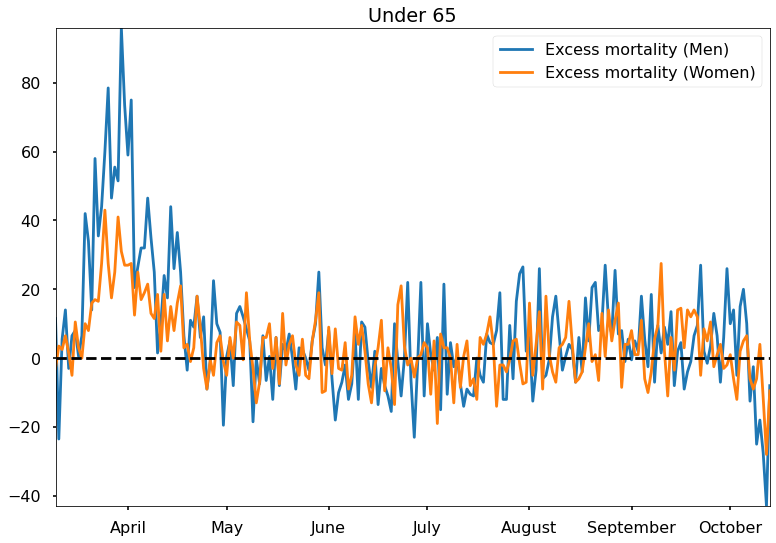

In [17]:
m_rows = df.loc[(df['ambito'] == 'nacional') & (df['nombre_sexo']=='hombres') & (df['nombre_gedad']=='edad < 65')
              & (df['fecha_defuncion']>'2020-03-10')]
f_rows = df.loc[(df['ambito'] == 'nacional') & (df['nombre_sexo']=='mujeres') & (df['nombre_gedad']=='edad < 65')
              & (df['fecha_defuncion']>'2020-03-10')]

m_excess = np.array(m_rows.defunciones_observadas) - np.array(m_rows.defunciones_esperadas)
f_excess = np.array(f_rows.defunciones_observadas) - np.array(f_rows.defunciones_esperadas)
dates = np.array(rows.fecha_defuncion)

plt.plot_date(dates[:-1],m_excess,'-',label='Excess mortality (Men)');
plt.plot_date(dates[:-1],f_excess,'-',label='Excess mortality (Women)');
#plt.plot_date(data_dates[30:],conf_deaths[30:],'-',label='Confirmed COVID-19 deaths')
plt.legend()
ax = plt.gca()
ax.autoscale(enable=True, axis='both', tight=True)
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%B'))
plt.title('Under 65');
plt.plot(xlim,[0,0],'--k')

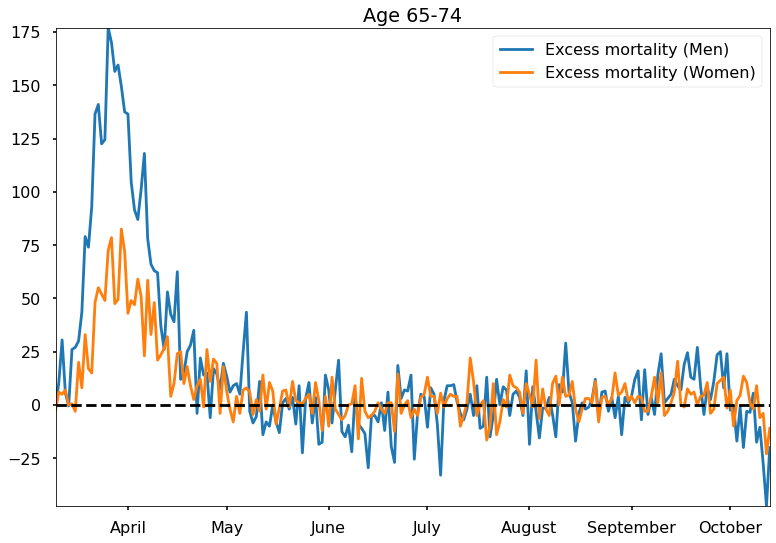

In [16]:
m_rows = df.loc[(df['ambito'] == 'nacional') & (df['nombre_sexo']=='hombres') & (df['nombre_gedad']=='edad 65-74')
              & (df['fecha_defuncion']>'2020-03-10')]
f_rows = df.loc[(df['ambito'] == 'nacional') & (df['nombre_sexo']=='mujeres') & (df['nombre_gedad']=='edad 65-74')
              & (df['fecha_defuncion']>'2020-03-10')]

m_excess = np.array(m_rows.defunciones_observadas) - np.array(m_rows.defunciones_esperadas)
f_excess = np.array(f_rows.defunciones_observadas) - np.array(f_rows.defunciones_esperadas)
dates = np.array(rows.fecha_defuncion)

plt.plot_date(dates[:-1],m_excess,'-',label='Excess mortality (Men)');
plt.plot_date(dates[:-1],f_excess,'-',label='Excess mortality (Women)');
#plt.plot_date(data_dates[30:],conf_deaths[30:],'-',label='Confirmed COVID-19 deaths')
plt.legend()
ax = plt.gca()
ax.autoscale(enable=True, axis='both', tight=True)
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%B'))
plt.title('Age 65-74');
plt.plot(xlim,[0,0],'--k')

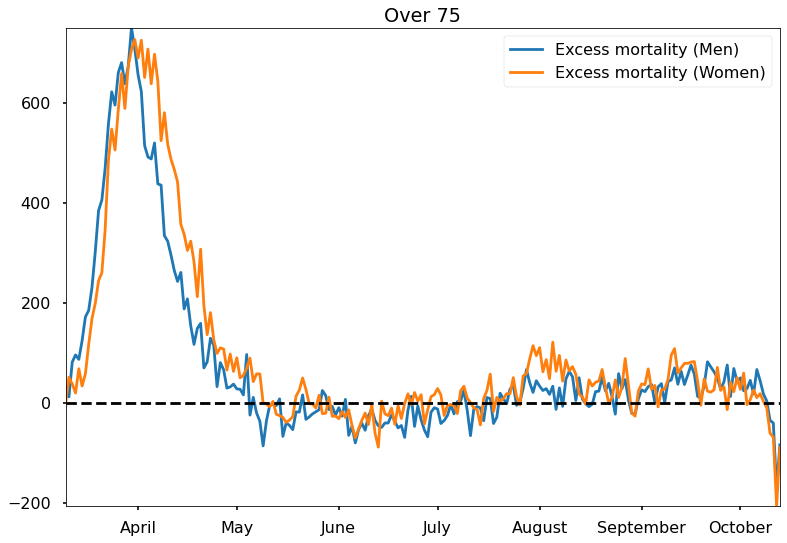

In [15]:
m_rows = df.loc[(df['ambito'] == 'nacional') & (df['nombre_sexo']=='hombres') & (df['nombre_gedad']=='edad > 75')
              & (df['fecha_defuncion']>'2020-03-10')]
f_rows = df.loc[(df['ambito'] == 'nacional') & (df['nombre_sexo']=='mujeres') & (df['nombre_gedad']=='edad > 75')
              & (df['fecha_defuncion']>'2020-03-10')]

m_excess = np.array(m_rows.defunciones_observadas) - np.array(m_rows.defunciones_esperadas)
f_excess = np.array(f_rows.defunciones_observadas) - np.array(f_rows.defunciones_esperadas)
dates = np.array(rows.fecha_defuncion)

plt.plot_date(dates[:-1],m_excess,'-',label='Excess mortality (Men)');
plt.plot_date(dates[:-1],f_excess,'-',label='Excess mortality (Women)');
#plt.plot_date(data_dates[30:],conf_deaths[30:],'-',label='Confirmed COVID-19 deaths')
plt.legend()
ax = plt.gca()
ax.autoscale(enable=True, axis='both', tight=True)
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%B'))
plt.title('Over 75');
xlim = plt.xlim()
plt.plot(xlim,[0,0],'--k')